### Third take... back to basics

#### Import Libraries and Load Data

This is the text expalining something 

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load the provided data set (csv)
plt.style.use('seaborn')
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
# Review size and shape of the data (at this stage)
print(df.shape)
display(df.info())
display('-'*60)
display(df.isnull().any())
display(df.isnull().sum())
display('-'*60)
df.head()

(21597, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

'------------------------------------------------------------'

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

'------------------------------------------------------------'

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


None

In [6]:
# Change nulls to 0 for 4 columns
df2 = df.replace(np.NaN, 0.0)
display(df2.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
# get rid of outliers for price (2 SD from mean)
df3 = df2[(np.abs(stats.zscore(df2['price']) < 2))]

In [9]:
df3 = df3.loc[df3['bedrooms'] < 33]

In [10]:
# Cut outliers for bathroom
df4 = df3[(np.abs(stats.zscore(df3['bathrooms']) < 2))]
df4['bathrooms'].value_counts()

2.50    5270
1.00    3849
1.75    3029
2.25    1988
2.00    1917
1.50    1439
2.75    1134
3.00     695
3.50     585
3.25     463
0.75      71
1.25       8
0.50       4
Name: bathrooms, dtype: int64

In [11]:
df4.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.045200e+04,2.045200e+04,20452.000000,20452.000000,20452.000000,2.045200e+04,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000
mean,4.608315e+09,4.824466e+05,3.318942,2.034581,1971.131527,1.442586e+04,1.473988,0.002934,0.180227,3.409544,7.537209,1703.154313,262.426951,1970.612165,60.877127,98078.546304,47.557376,-122.214029,1925.906904,12323.607667
std,2.875341e+09,2.198012e+05,0.867106,0.674796,763.014605,3.907029e+04,0.536213,0.054085,0.658488,0.648611,1.041994,716.047483,406.546542,29.183358,343.183834,53.392555,0.140760,0.141756,617.946162,25521.745139
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.138700e+09,3.150000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1951.000000,0.000000,98033.000000,47.461600,-122.330000,1470.000000,5046.000000
50%,3.906610e+09,4.380000e+05,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1974.000000,0.000000,98065.000000,47.567650,-122.233000,1800.000000,7552.000000
75%,7.338220e+09,6.050000e+05,4.000000,2.500000,2430.000000,1.034450e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2100.000000,500.000000,1996.000000,0.000000,98118.000000,47.679600,-122.124000,2280.000000,9900.000000
max,9.900000e+09,1.270000e+06,11.000000,3.500000,7350.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5450.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,560617.000000


In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [16]:
df3.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.075500e+04,2.075500e+04,20755.000000,20755.000000,20755.000000,2.075500e+04,20755.000000,20755.000000,20755.000000,20755.000000,20755.000000,20755.000000,20755.000000,20755.000000,20755.000000,20755.000000,20755.000000,20755.000000,20755.000000,20755.000000
mean,4.596393e+09,4.877189e+05,3.340063,2.065466,1998.144495,1.468351e+04,1.480438,0.002987,0.184486,3.406794,7.560540,1725.719586,266.824621,1970.863310,62.397784,98078.455505,47.557779,-122.213313,1938.368586,12495.976054
std,2.877324e+09,2.244572e+05,0.888933,0.718731,798.500369,4.004138e+04,0.536989,0.054575,0.666905,0.647321,1.063936,744.434315,412.561799,29.209512,347.323964,53.336605,0.140382,0.141989,632.295309,26504.992907
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.126059e+09,3.170000e+05,3.000000,1.500000,1406.500000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.462900,-122.330000,1470.000000,5060.000000
50%,3.905040e+09,4.400000e+05,3.000000,2.250000,1870.000000,7.521000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1974.000000,0.000000,98065.000000,47.568200,-122.231000,1810.000000,7560.000000
75%,7.335400e+09,6.131000e+05,4.000000,2.500000,2460.000000,1.040000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,510.000000,1996.000000,0.000000,98118.000000,47.679400,-122.123000,2300.000000,9926.500000
max,9.900000e+09,1.270000e+06,11.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,7320.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [13]:
# Create the low priced df... use < 438K and also > 154K
df6_low = df4.loc[(df4['price'] >= 154000) & (df4['price'] <= 438000)]
df6_low.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113


In [14]:
df6_low.shape

(10013, 21)

In [17]:
df6_low.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.001300e+04,10013.000000,10013.000000,10013.000000,10013.000000,1.001300e+04,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.00000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000
mean,4.532335e+09,315458.913512,3.138021,1.810846,1620.552382,1.149925e+04,1.366424,0.000899,0.065814,3.393588,7.051533,1435.096475,181.81524,1970.439529,40.781784,98079.056626,47.498488,-122.222378,1666.435933,10532.579247
std,2.835075e+09,71806.431996,0.821046,0.634038,546.113648,2.764064e+04,0.513024,0.029969,0.389590,0.636318,0.754889,508.339971,326.89023,26.622144,282.110808,56.642832,0.152575,0.136803,436.815360,20690.991073
min,1.000102e+06,154000.000000,1.000000,0.500000,370.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.00000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000
25%,2.120069e+09,259900.000000,3.000000,1.000000,1220.000000,5.264000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1070.000000,0.00000,1953.000000,0.000000,98031.000000,47.367500,-122.328000,1350.000000,5376.000000
50%,3.834001e+09,319000.000000,3.000000,1.750000,1560.000000,7.575000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1320.000000,0.00000,1969.000000,0.000000,98058.000000,47.489900,-122.259000,1600.000000,7620.000000
75%,7.262200e+09,375000.000000,4.000000,2.500000,1960.000000,9.750000e+03,2.000000,0.000000,0.000000,4.000000,7.000000,1700.000000,290.00000,1992.000000,0.000000,98125.000000,47.607000,-122.157000,1930.000000,9452.000000
max,9.900000e+09,438000.000000,8.000000,3.500000,4340.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,11.000000,3880.000000,2030.00000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,3740.000000,392040.000000


In [15]:
# save df6_low as csv file and upload to our repository
df6_low.to_csv(r'data/df6low.csv')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005299,0.010252,0.034356,0.013668,-0.106822,0.025009,-0.016617,0.013443,-0.037982,0.048701,0.013571,0.001370,0.032271,-0.023231,-0.009639,-0.019614,-0.013826,-0.010540,-0.121011
price,0.005299,1.000000,0.131737,0.275894,0.319244,0.040255,0.210817,0.014285,0.073872,-0.039976,0.350015,0.257467,0.129117,0.132221,0.006619,0.067138,0.433819,0.031031,0.291342,0.037685
bedrooms,0.010252,0.131737,1.000000,0.456862,0.630390,-0.004410,0.120127,-0.029398,-0.011227,0.017409,0.284716,0.490554,0.282554,0.205520,-0.012948,-0.161026,-0.217115,0.093881,0.357562,-0.008234
bathrooms,0.034356,0.275894,0.456862,1.000000,0.666162,-0.029874,0.516365,-0.021276,0.005015,-0.167055,0.552815,0.596734,0.182416,0.638560,-0.032169,-0.247257,-0.242330,0.183049,0.487811,-0.033412
sqft_living,0.013668,0.319244,0.630390,0.666162,1.000000,0.048416,0.283852,-0.016508,0.051182,-0.078388,0.542432,0.807316,0.407173,0.376982,-0.006618,-0.230584,-0.302543,0.165972,0.658236,0.062199
sqft_lot,-0.106822,0.040255,-0.004410,-0.029874,0.048416,1.000000,-0.089009,0.019309,0.119344,0.026193,-0.036048,0.046787,0.008654,-0.053419,0.025124,-0.108058,-0.090084,0.188525,0.114986,0.631889
floors,0.025009,0.210817,0.120127,0.516365,0.283852,-0.089009,1.000000,-0.008431,-0.046211,-0.269576,0.406180,0.493994,-0.288485,0.567945,-0.031095,-0.085659,-0.050703,0.086069,0.222115,-0.098403
waterfront,-0.016617,0.014285,-0.029398,-0.021276,-0.016508,0.019309,-0.008431,1.000000,0.260129,0.012873,-0.028538,-0.016233,-0.002002,-0.026910,-0.004336,0.008384,-0.014356,-0.048276,-0.001983,0.060361
view,0.013443,0.073872,-0.011227,0.005015,0.051182,0.119344,-0.046211,0.260129,1.000000,0.029664,0.009862,0.001841,0.084525,-0.065423,0.000792,0.060223,-0.072325,-0.005543,0.106734,0.123280
condition,-0.037982,-0.039976,0.017409,-0.167055,-0.078388,0.026193,-0.269576,0.012873,0.029664,1.000000,-0.180920,-0.139844,0.079251,-0.282346,-0.043163,-0.055332,-0.065782,0.003235,-0.127227,0.047044


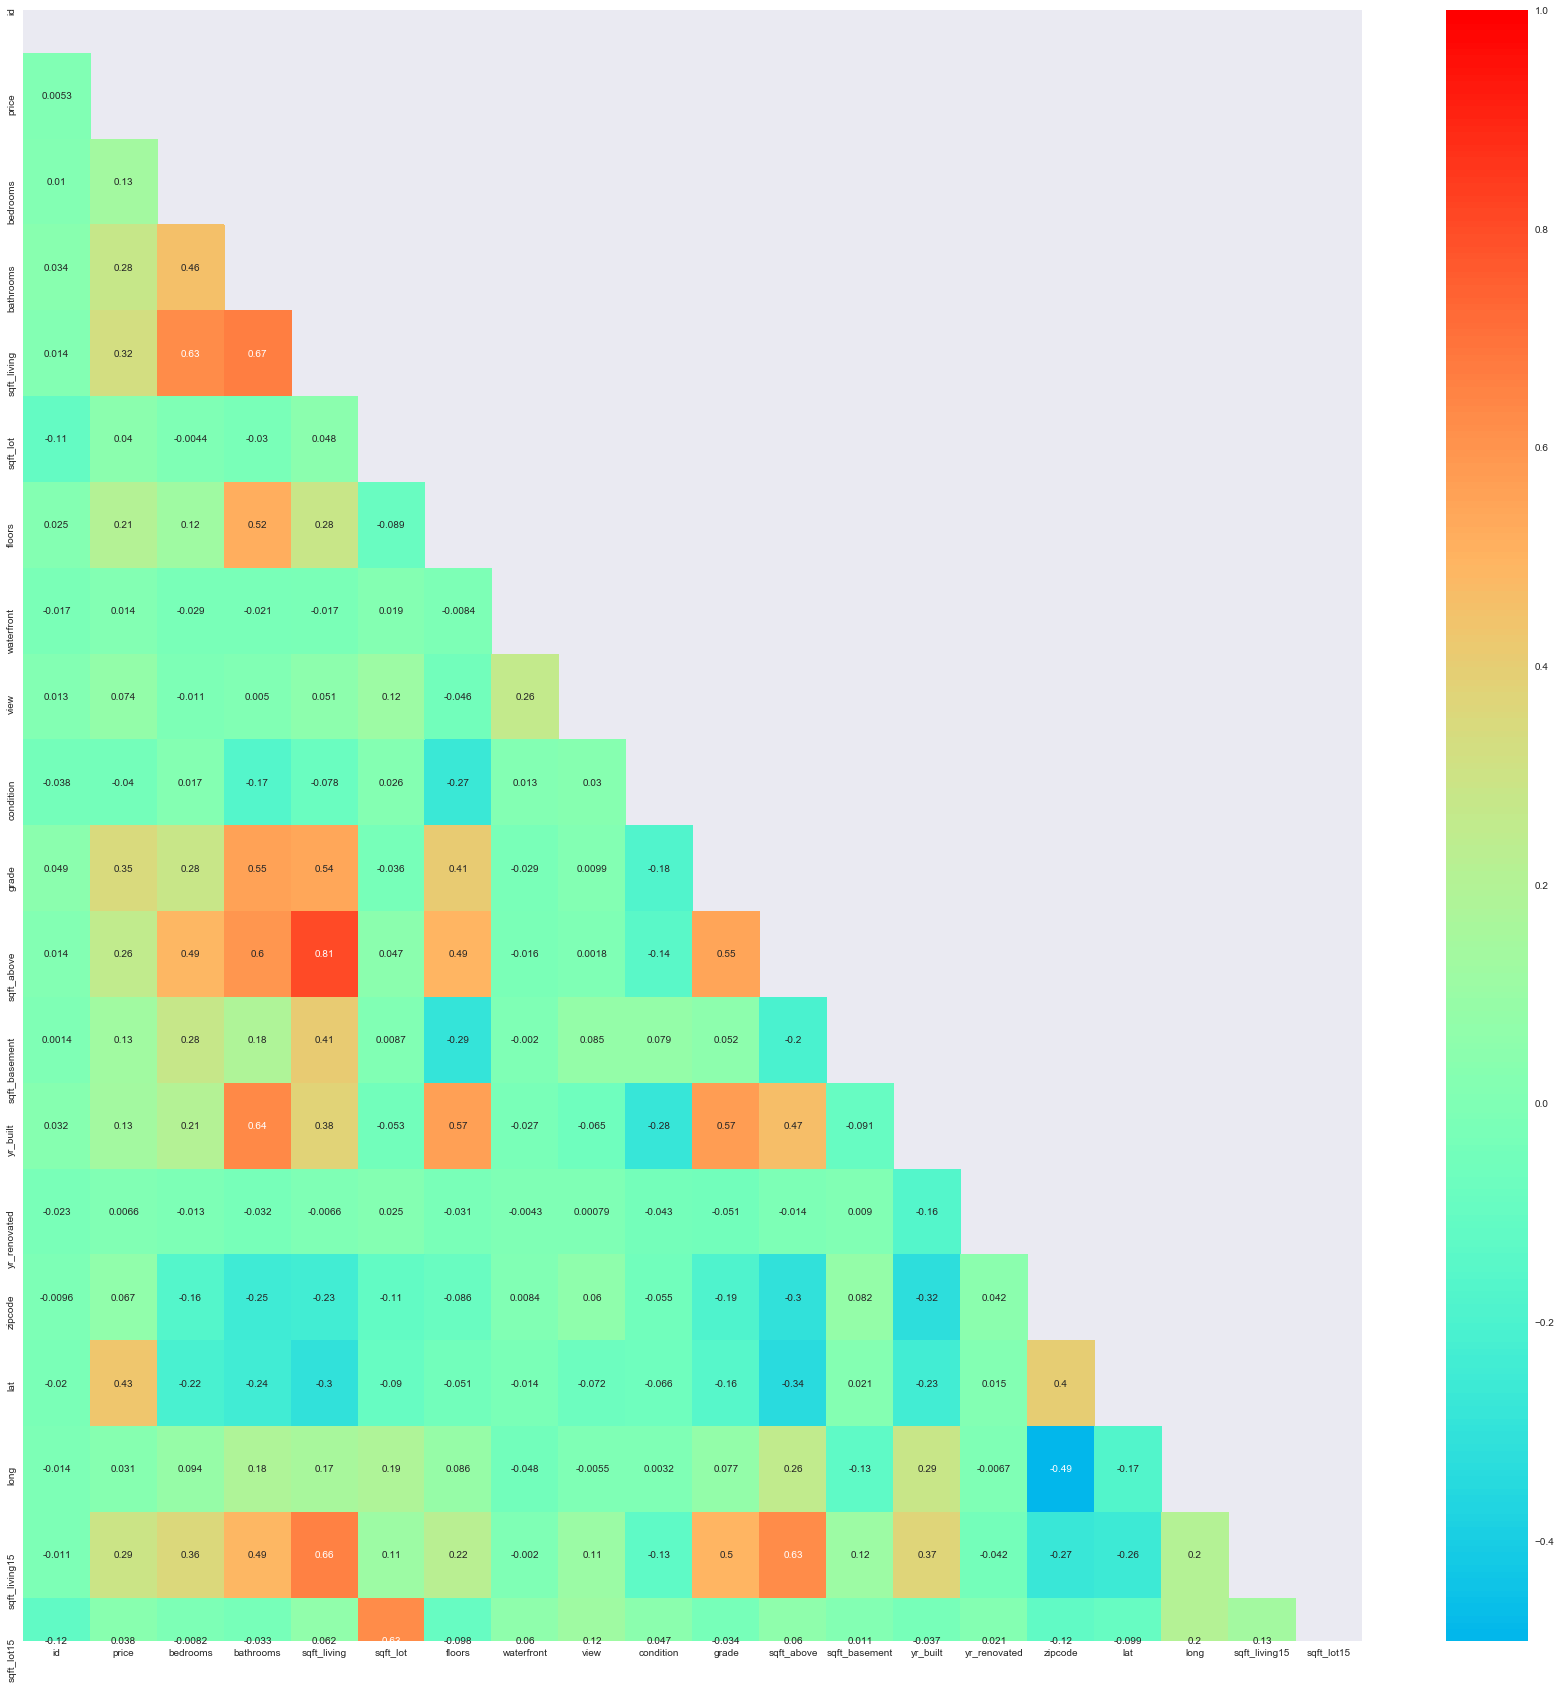

In [28]:
corr = df6_low.corr()
display(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,30))
sns.heatmap(corr, cmap='rainbow', mask = mask, annot=True, center=0)

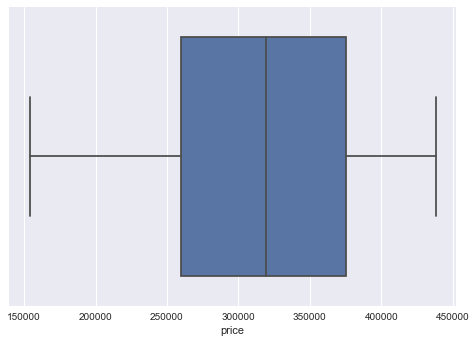

In [18]:
sns.boxplot(x=df6_low['price'])

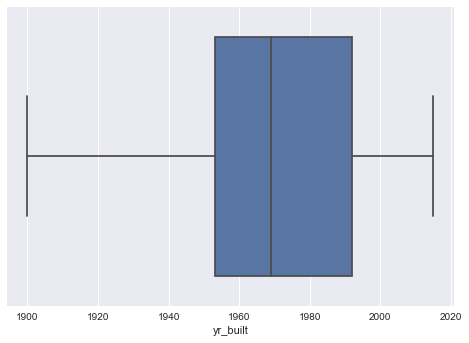

In [19]:
sns.boxplot(x=df6_low['yr_built'])

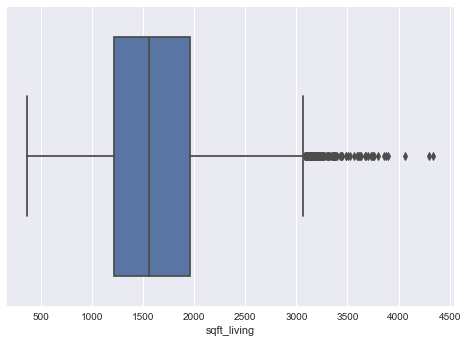

In [22]:
sns.boxplot(x=df6_low['sqft_living'])

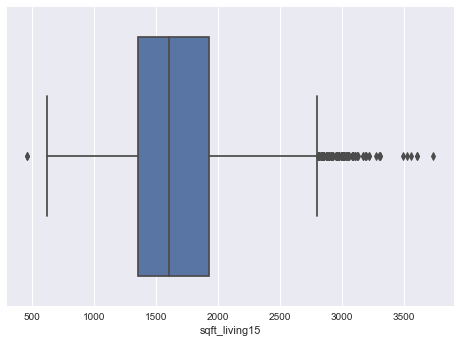

In [67]:
sns.boxplot(x=df6_low['sqft_living15'])

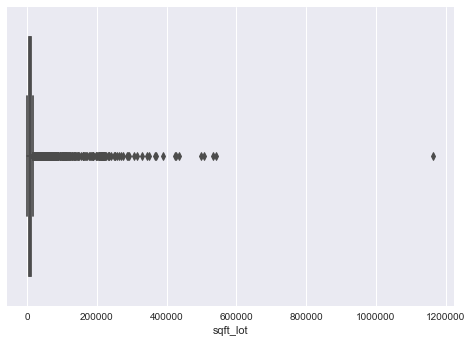

In [23]:
sns.boxplot(x=df6_low['sqft_lot'])

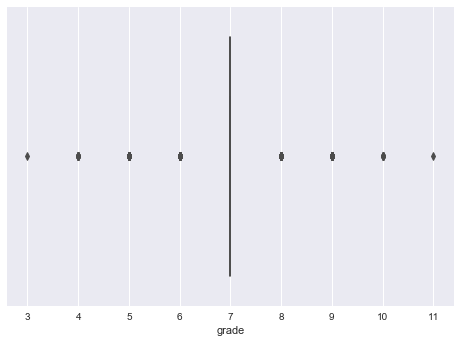

In [65]:
sns.boxplot(x=df6_low['grade'])

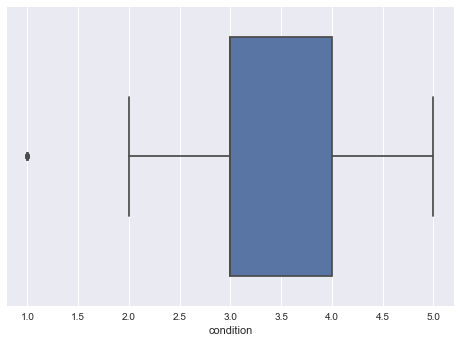

In [21]:
sns.boxplot(x=df6_low['condition'])

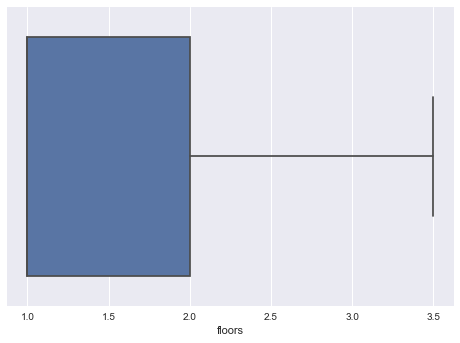

In [66]:
sns.boxplot(x=df6_low['floors'])

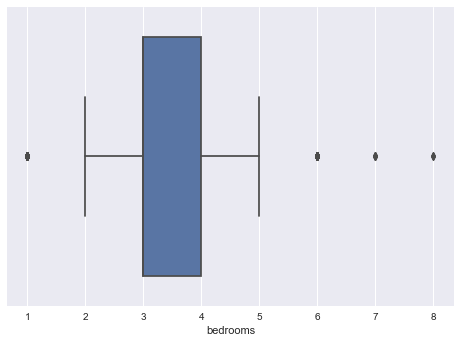

In [24]:
sns.boxplot(x=df6_low['bedrooms'])

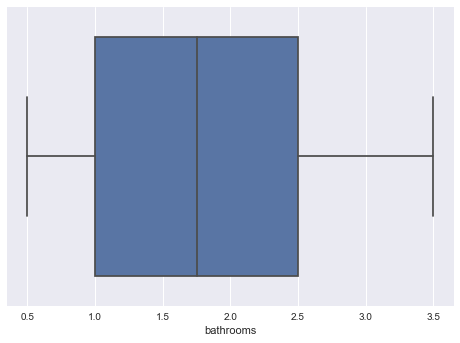

In [64]:
sns.boxplot(x=df6_low['bathrooms'])

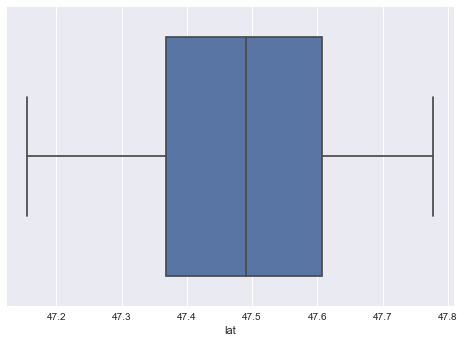

In [70]:
sns.boxplot(x=df6_low['lat'])

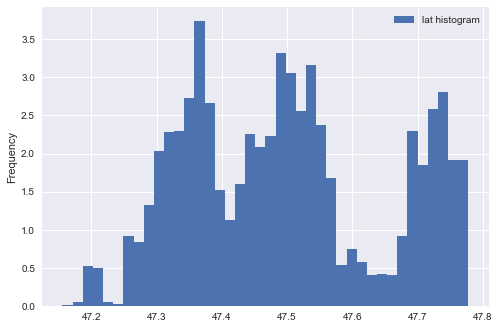

In [72]:
df6_low.lat.plot.hist(density=True, bins=40, label = 'lat histogram')
plt.legend()
plt.show()

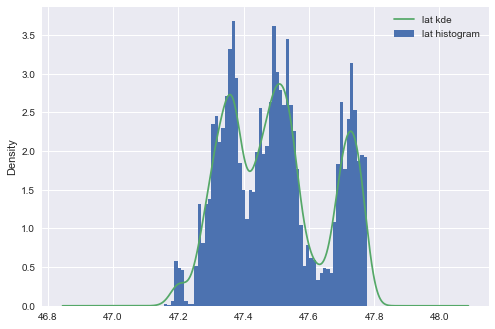

In [73]:
df6_low.lat.plot.hist(density=True, bins=60, label = 'lat histogram')
df6_low.lat.plot.kde(label ='lat kde')
plt.legend()
plt.show()


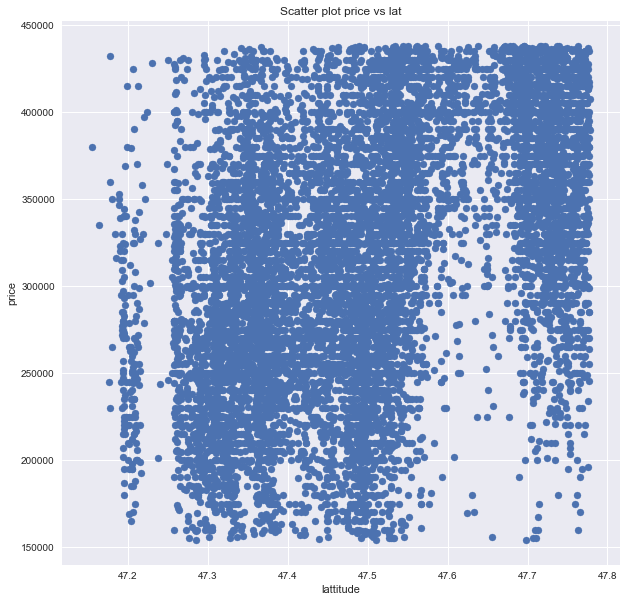

In [75]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df6_low['lat'], df6_low['price'])
plt.title('Scatter plot price vs lat')
ax.set_xlabel('lattitude')
ax.set_ylabel('price')
plt.show()

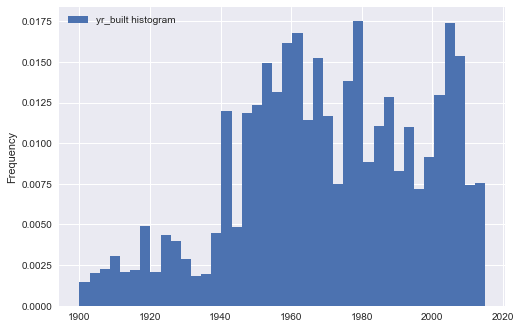

In [83]:
df6_low.yr_built.plot.hist(density=True, bins=40, label = 'yr_built histogram')
plt.legend()
plt.show()

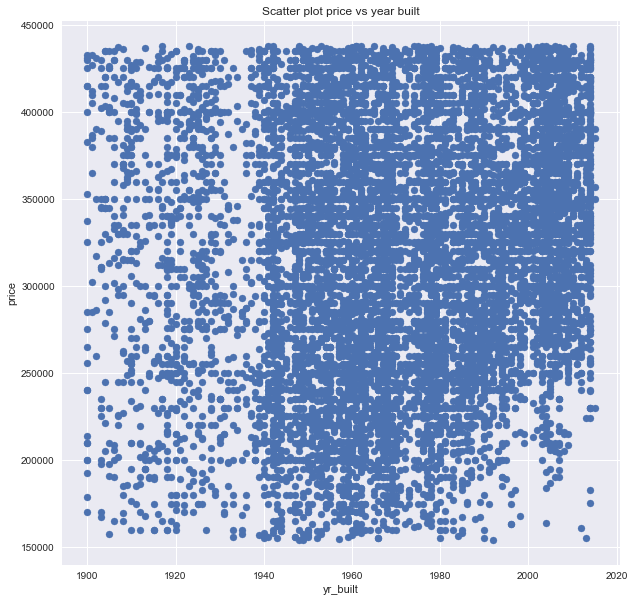

In [84]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df6_low['yr_built'], df6_low['price'])
plt.title('Scatter plot price vs year built')
ax.set_xlabel('yr_built')
ax.set_ylabel('price')
plt.show()

### Explore different plots

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


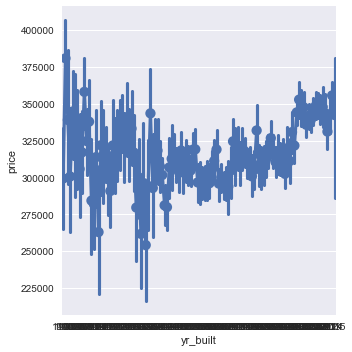

In [25]:
sns.factorplot(data=df6_low, x= "yr_built", y="price")

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


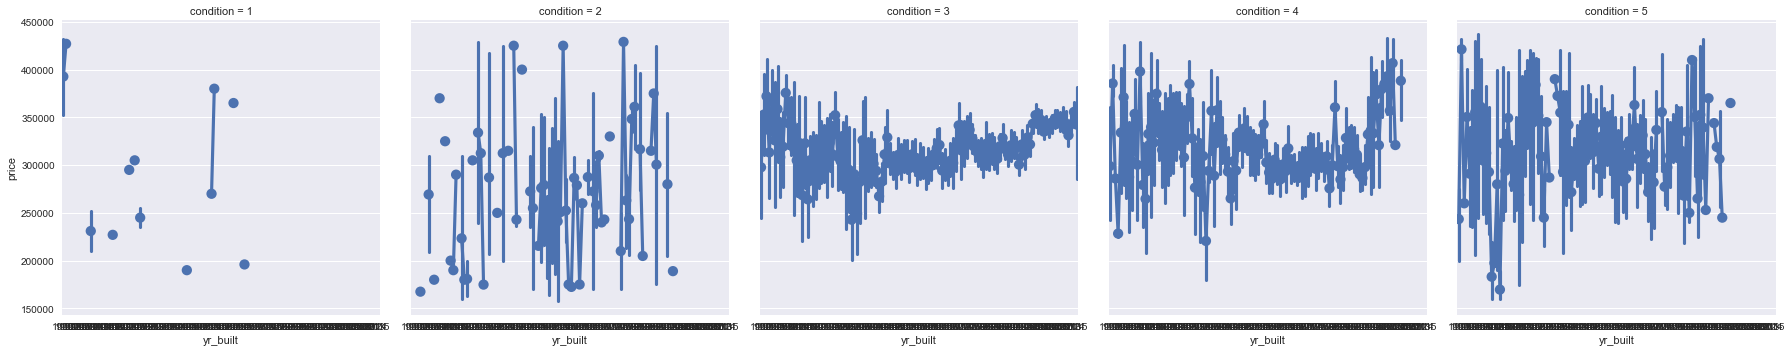

In [27]:
sns.factorplot(data=df6_low, x= "yr_built", y="price", col="condition")

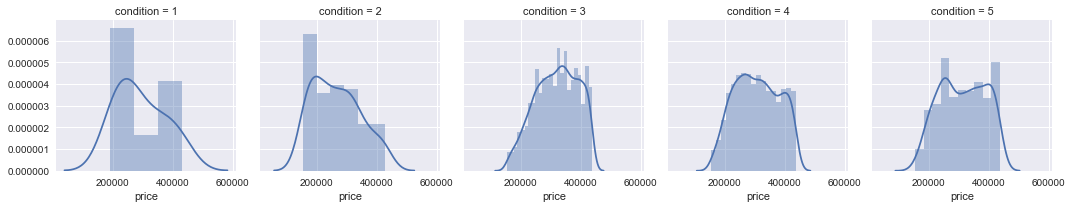

In [31]:
g = sns.FacetGrid(df6_low, col="condition") 
g.map(sns.distplot, "price")

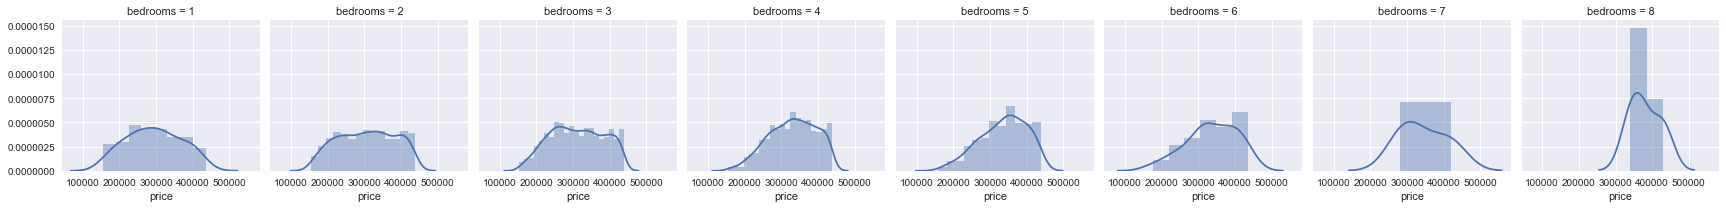

In [32]:
g = sns.FacetGrid(df6_low, col="bedrooms") 
g.map(sns.distplot, "price")

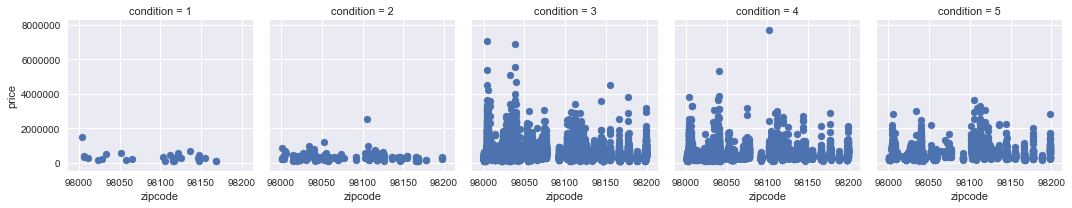

In [34]:
g = sns.FacetGrid(df, col="condition") 
g.map(plt.scatter, "zipcode", "price")

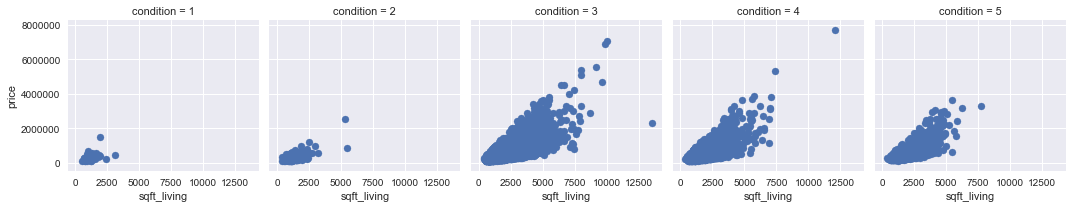

In [35]:
g = sns.FacetGrid(df, col="condition") 
g.map(plt.scatter, "sqft_living", "price")

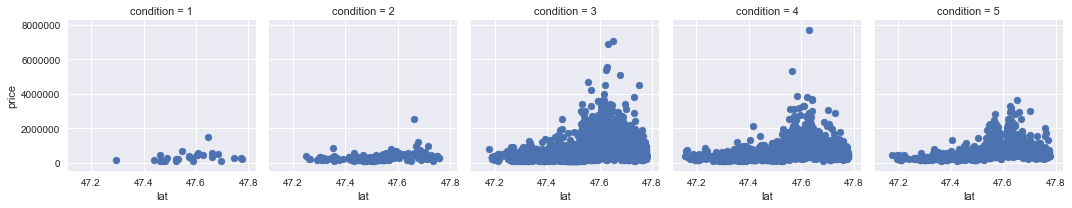

In [36]:
g = sns.FacetGrid(df, col="condition") 
g.map(plt.scatter, "lat", "price")

(0, 500000)

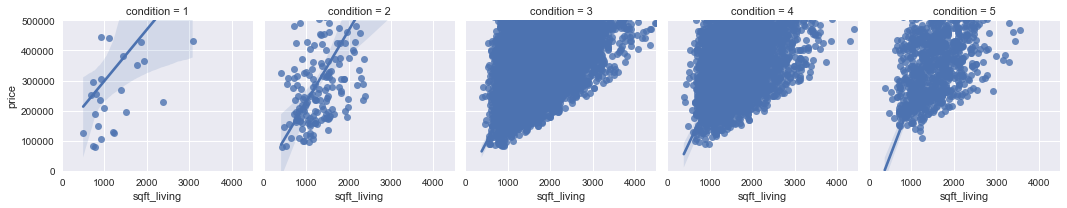

In [38]:
g = sns.FacetGrid(df, col="condition") 
g.map(sns.regplot, "sqft_living", "price") 
plt.xlim(0, 4500) 
plt.ylim(0, 500000)

(0, 500000)

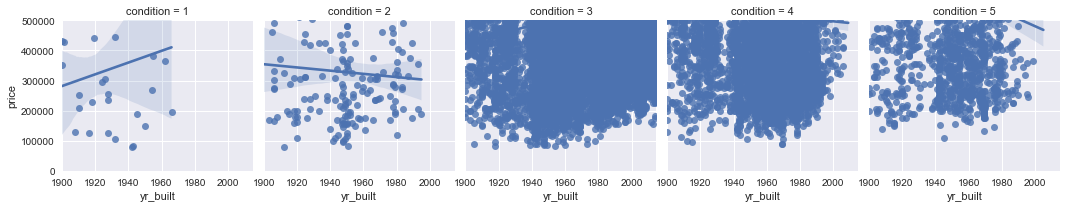

In [39]:
g = sns.FacetGrid(df, col="condition") 
g.map(sns.regplot, "yr_built", "price") 
plt.xlim(1900, 2015) 
plt.ylim(0, 500000)

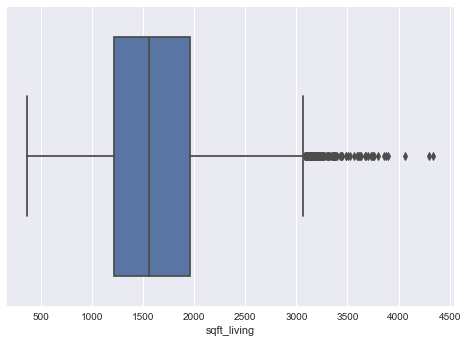

In [102]:
sns.boxplot(x=df9['sqft_living'])

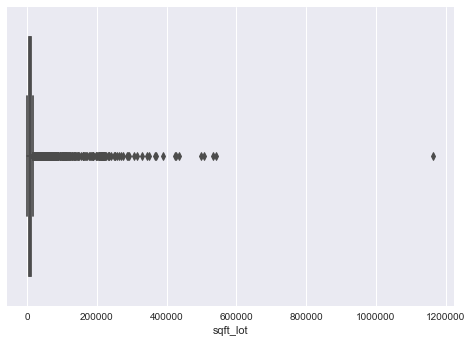

In [103]:
sns.boxplot(x=df9['sqft_lot'])

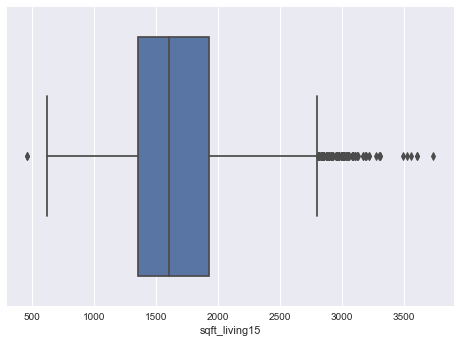

In [104]:
sns.boxplot(x=df9['sqft_living15'])

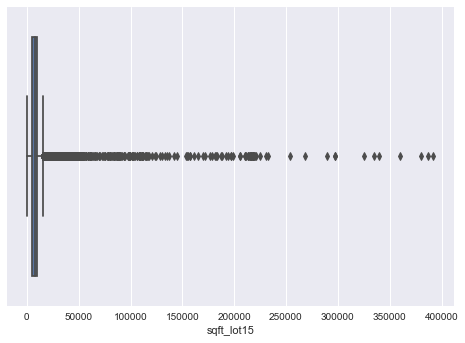

In [105]:
sns.boxplot(x=df9['sqft_lot15'])

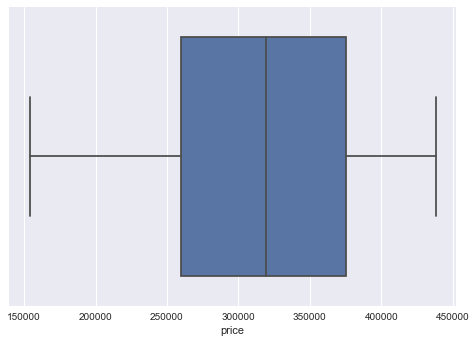

In [106]:
sns.boxplot(x=df9['price'])

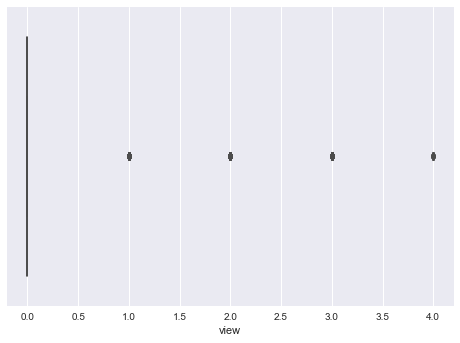

In [107]:
sns.boxplot(x=df9['view'])

In [108]:
df9['view'].value_counts()

0.0    9700
2.0     176
3.0      64
1.0      59
4.0      14
Name: view, dtype: int64

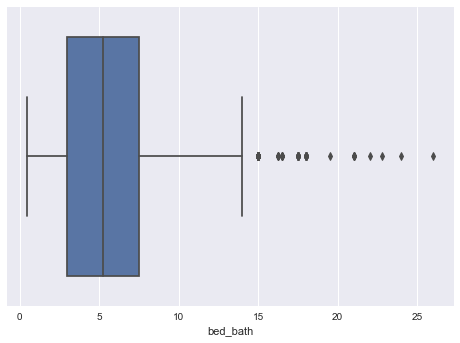

In [109]:
sns.boxplot(x=df9['bed_bath'])

In [110]:
df9['grade'].value_counts()

7     5788
8     2093
6     1681
9      242
5      181
4       16
10      10
11       1
3        1
Name: grade, dtype: int64

Text(0, 0.5, 'Price')

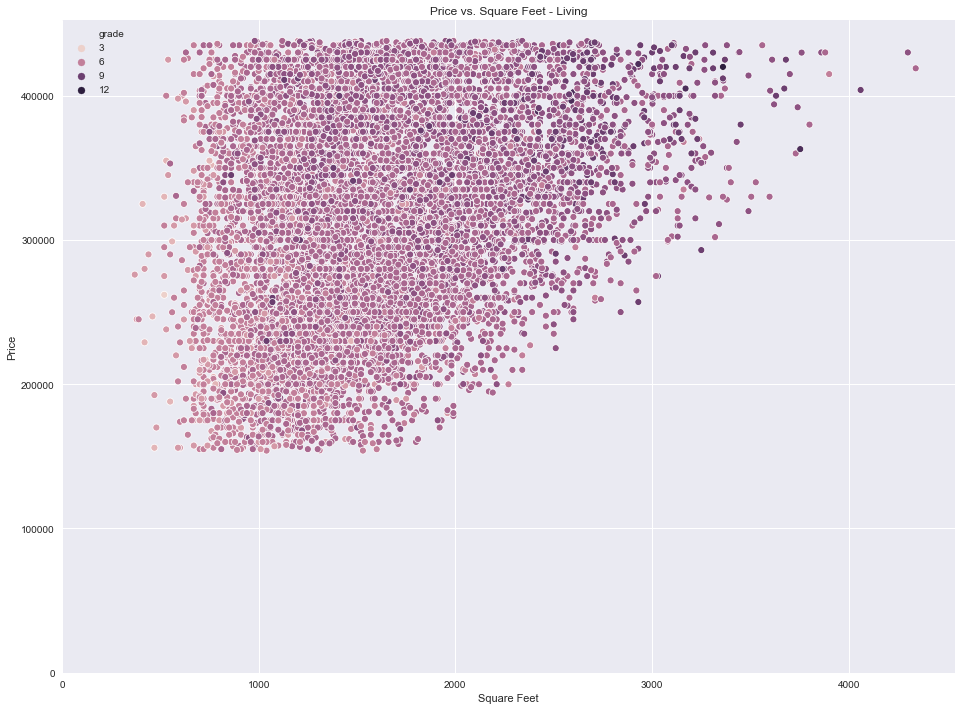

In [101]:
plt.figure(figsize=(16,12))
ax = sns.scatterplot(data=df6_low, x="sqft_living", y="price", hue="grade")
plt.xlim(0,None)
plt.ylim(0,None)
plt.title("Price vs. Square Feet - Living")
plt.xlabel("Square Feet")
plt.ylabel("Price")

In [ ]:
# Creating scaled data... with min and max
scaled_living = (df6['sqft_living'] - min(df6['sqft_living'])) / (max(df6['sqft_living']) - min(df6['sqft_living']))
df0['sc_living'] = scaled_living

scaled_living15 = (df6['sqft_living15'] - min(df6['sqft_living15'])) / (max(df6['sqft_living15']) - min(df6['sqft_living15']))
df0['sc_living15'] = scaled_living15

scaled_lot15 = (df6['sqft_lot15'] - min(df6['sqft_lot15'])) / (max(df6['sqft_lot15']) - min(df6['sqft_lot15']))
df0['sc_lot15'] = scaled_lot15

scaled_lot = (df6['sqft_lot'] - min(df6['sqft_lot'])) / (max(df6['sqft_lot']) - min(df6['sqft_lot']))
df0['sc_lot'] = scaled_lot

scaled_above = (df6['sqft_above'] - min(df6['sqft_above'])) / (max(df6['sqft_above']) - min(df6['sqft_above']))
df0['sc_above'] = scaled_above

scaled_basement = (df6['sqft_basement'] - min(df6['sqft_basement'])) / (max(df6['sqft_basement']) - min(df6['sqft_basement']))
df0['sc_basement'] = scaled_basement



In [ ]:
# Try and create bands of "lat" with .cut method? lat vaules range 47.1559 to 47.7776 > try for 6 bands?
# example: df_ages['age_by_decade'] = pd.cut(x=df_ages['age'], bins=[20, 29, 39, 49], labels=['20s', '30s', '40s'])



In [40]:
# Create an interaction term from 2 variables
df6_low['bed_bath'] = (df6_low['bedrooms'] * df6_low['bathrooms'])
df6_low.head()

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3.00
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2.00
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,6.75
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,4.50
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,3.00


In [45]:
df6_low['bed_bath'].nunique()

47

In [46]:
# df6_low['bed_bath'].value_counts()

In [47]:
df6_low['lat'].nunique()

4035

In [81]:
df6_low.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,lat_bands
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3.0,"(47.467, 47.57]"
2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2.0,"(47.674, 47.778]"


In [94]:
df6_low.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath
count,1.001300e+04,10013.000000,10013.000000,10013.000000,10013.000000,1.001300e+04,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.00000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000
mean,4.532335e+09,315458.913512,3.138021,1.810846,1620.552382,1.149925e+04,1.366424,0.000899,0.065814,3.393588,7.051533,1435.096475,181.81524,1970.439529,40.781784,98079.056626,47.498488,-122.222378,1666.435933,10532.579247,5.920279
std,2.835075e+09,71806.431996,0.821046,0.634038,546.113648,2.764064e+04,0.513024,0.029969,0.389590,0.636318,0.754889,508.339971,326.89023,26.622144,282.110808,56.642832,0.152575,0.136803,436.815360,20690.991073,3.031287
min,1.000102e+06,154000.000000,1.000000,0.500000,370.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.00000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000,0.500000
25%,2.120069e+09,259900.000000,3.000000,1.000000,1220.000000,5.264000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1070.000000,0.00000,1953.000000,0.000000,98031.000000,47.367500,-122.328000,1350.000000,5376.000000,3.000000
50%,3.834001e+09,319000.000000,3.000000,1.750000,1560.000000,7.575000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1320.000000,0.00000,1969.000000,0.000000,98058.000000,47.489900,-122.259000,1600.000000,7620.000000,5.250000
75%,7.262200e+09,375000.000000,4.000000,2.500000,1960.000000,9.750000e+03,2.000000,0.000000,0.000000,4.000000,7.000000,1700.000000,290.00000,1992.000000,0.000000,98125.000000,47.607000,-122.157000,1930.000000,9452.000000,7.500000
max,9.900000e+09,438000.000000,8.000000,3.500000,4340.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,11.000000,3880.000000,2030.00000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,3740.000000,392040.000000,26.000000


In [ ]:
# Try and create bands of "lat" with .cut method? lat vaules range 47.1559 to 47.7776 > try for 6 bands?
# example: df_ages['age_by_decade'] = pd.cut(x=df_ages['age'], bins=[20, 29, 39, 49], labels=['20s', '30s', '40s'])

In [76]:
pd.cut(df6_low['lat'], bins=6)

0         (47.467, 47.57]
2        (47.674, 47.778]
6         (47.26, 47.363]
7        (47.363, 47.467]
8         (47.467, 47.57]
               ...       
21592    (47.674, 47.778]
21593     (47.467, 47.57]
21594     (47.57, 47.674]
21595     (47.467, 47.57]
21596     (47.57, 47.674]
Name: lat, Length: 10013, dtype: category
Categories (6, interval[float64]): [(47.155, 47.26] < (47.26, 47.363] < (47.363, 47.467] < (47.467, 47.57] < (47.57, 47.674] < (47.674, 47.778]]

In [77]:
pd.cut(df6_low['lat'], bins=6).value_counts()

(47.467, 47.57]     2782
(47.674, 47.778]    2193
(47.363, 47.467]    2133
(47.26, 47.363]     2081
(47.57, 47.674]      591
(47.155, 47.26]      233
Name: lat, dtype: int64

In [82]:
df6_low['lat_bands'] = pd.cut(df6_low['lat'], bins=6)
df6_low.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,lat_bands
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3.0,"(47.467, 47.57]"
2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2.0,"(47.674, 47.778]"


In [87]:
yrbuilt_labels = ['115', '95', '75', '55', '35', '15']
cut_bins = [1900, 1920, 1940, 1960, 1980, 2000, 2015]
df6_low['yrbuilt_bands'] = pd.cut(df6_low['yr_built'], bins=cut_bins, labels=yrbuilt_labels)
df6_low.head(2)

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,lat_bands,yrbuilt_bands
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3.0,"(47.467, 47.57]",75
2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2.0,"(47.674, 47.778]",95


In [89]:
df6_low.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,lat_bands,yrbuilt_bands
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3.00,"(47.467, 47.57]",75
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2.00,"(47.674, 47.778]",95
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,6.75,"(47.26, 47.363]",35
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,4.50,"(47.363, 47.467]",55
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,3.00,"(47.467, 47.57]",75


In [ ]:
# example
cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
cut_bins = [0, 70000, 100000, 130000, 200000]
df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)

In [ ]:
# consider turning lat_bands and yr_built_bands into dummies?
# bedrooms_dummies = pd.get_dummies(df1['bedrooms'], prefix='bed', drop_first=True)
# df2 = pd.concat([df1, bedrooms_dummies], axis=1)
# df2.head()

In [90]:
yrbuilt_bands_dummies = pd.get_dummies(df6_low['yrbuilt_bands'], prefix='yrbuilt', drop_first=True)
df7 = pd.concat([df6_low, yrbuilt_bands_dummies], axis=1)
df7.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,lat_bands,yrbuilt_bands,yrbuilt_95,yrbuilt_75,yrbuilt_55,yrbuilt_35,yrbuilt_15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3.00,"(47.467, 47.57]",75,0,1,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2.00,"(47.674, 47.778]",95,1,0,0,0,0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,6.75,"(47.26, 47.363]",35,0,0,0,1,0
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,4.50,"(47.363, 47.467]",55,0,0,1,0,0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,3.00,"(47.467, 47.57]",75,0,1,0,0,0


In [91]:
lat_bands_dummies = pd.get_dummies(df7['lat_bands'], prefix='lat', drop_first=True)
df8 = pd.concat([df7, lat_bands_dummies], axis=1)
df8.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,lat_bands,yrbuilt_bands,yrbuilt_95,yrbuilt_75,yrbuilt_55,yrbuilt_35,yrbuilt_15,"lat_(47.26, 47.363]","lat_(47.363, 47.467]","lat_(47.467, 47.57]","lat_(47.57, 47.674]","lat_(47.674, 47.778]"
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3.00,"(47.467, 47.57]",75,0,1,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2.00,"(47.674, 47.778]",95,1,0,0,0,0,0,0,0,0,1
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,6.75,"(47.26, 47.363]",35,0,0,0,1,0,1,0,0,0,0
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,4.50,"(47.363, 47.467]",55,0,0,1,0,0,0,1,0,0,0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,3.00,"(47.467, 47.57]",75,0,1,0,0,0,0,0,1,0,0


In [93]:
# Need to rename the lat dummies
df9 = df8.rename(columns={'lat_(47.26, 47.363]':'lat_2', 'lat_(47.363, 47.467]':'lat_3', 'lat_(47.467, 47.57]':'lat_4', 'lat_(47.57, 47.674]':'lat_5', 'lat_(47.674, 47.778]':'lat_6'})
df9.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,lat_bands,yrbuilt_bands,yrbuilt_95,yrbuilt_75,yrbuilt_55,yrbuilt_35,yrbuilt_15,lat_2,lat_3,lat_4,lat_5,lat_6
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3.00,"(47.467, 47.57]",75,0,1,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2.00,"(47.674, 47.778]",95,1,0,0,0,0,0,0,0,0,1
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,6.75,"(47.26, 47.363]",35,0,0,0,1,0,1,0,0,0,0
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,4.50,"(47.363, 47.467]",55,0,0,1,0,0,0,1,0,0,0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,3.00,"(47.467, 47.57]",75,0,1,0,0,0,0,0,1,0,0


In [100]:
df9.shape

(10013, 34)

In [111]:
df9.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,yrbuilt_95,yrbuilt_75,yrbuilt_55,yrbuilt_35,yrbuilt_15,lat_2,lat_3,lat_4,lat_5,lat_6
count,1.001300e+04,10013.000000,10013.000000,10013.000000,10013.000000,1.001300e+04,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.00000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000
mean,4.532335e+09,315458.913512,3.138021,1.810846,1620.552382,1.149925e+04,1.366424,0.000899,0.065814,3.393588,7.051533,1435.096475,181.81524,1970.439529,40.781784,98079.056626,47.498488,-122.222378,1666.435933,10532.579247,5.920279,0.061920,0.245281,0.270049,0.196445,0.174373,0.207830,0.213023,0.277839,0.059023,0.219015
std,2.835075e+09,71806.431996,0.821046,0.634038,546.113648,2.764064e+04,0.513024,0.029969,0.389590,0.636318,0.754889,508.339971,326.89023,26.622144,282.110808,56.642832,0.152575,0.136803,436.815360,20690.991073,3.031287,0.241021,0.430275,0.444007,0.397328,0.379449,0.405775,0.409464,0.447956,0.235680,0.413600
min,1.000102e+06,154000.000000,1.000000,0.500000,370.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.00000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.120069e+09,259900.000000,3.000000,1.000000,1220.000000,5.264000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1070.000000,0.00000,1953.000000,0.000000,98031.000000,47.367500,-122.328000,1350.000000,5376.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.834001e+09,319000.000000,3.000000,1.750000,1560.000000,7.575000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1320.000000,0.00000,1969.000000,0.000000,98058.000000,47.489900,-122.259000,1600.000000,7620.000000,5.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.262200e+09,375000.000000,4.000000,2.500000,1960.000000,9.750000e+03,2.000000,0.000000,0.000000,4.000000,7.000000,1700.000000,290.00000,1992.000000,0.000000,98125.000000,47.607000,-122.157000,1930.000000,9452.000000,7.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,9.900000e+09,438000.000000,8.000000,3.500000,4340.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,11.000000,3880.000000,2030.00000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,3740.000000,392040.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
df11['yrbuilt_bands'].value_counts()

55     2575
75     2384
35     1876
15     1685
95      590
115     481
Name: yrbuilt_bands, dtype: int64

### Before model 2 + do some outlier removal

In [112]:
# Start with removal of sqft_living
df11 = df9.loc[df9['sqft_living'] < 3100]
df11.shape

(9900, 34)

In [114]:
df11.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,yrbuilt_95,yrbuilt_75,yrbuilt_55,yrbuilt_35,yrbuilt_15,lat_2,lat_3,lat_4,lat_5,lat_6
count,9.900000e+03,9900.000000,9900.000000,9900.000000,9900.000000,9.900000e+03,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000
mean,4.525439e+09,314709.572626,3.126465,1.801692,1600.955152,1.142595e+04,1.362980,0.000909,0.064646,3.394040,7.041111,1420.335253,177.182121,1970.248283,41.049091,98079.327677,47.499959,-122.222532,1656.688586,10480.019596,5.862854,0.062626,0.247273,0.269394,0.196162,0.172121,0.204848,0.211313,0.279899,0.059596,0.221313
std,2.831975e+09,71746.486505,0.813418,0.630046,516.625518,2.762880e+04,0.512633,0.030139,0.386224,0.637249,0.747172,487.316692,318.066444,26.637885,283.025173,56.644045,0.152502,0.136954,426.527894,20646.092851,2.978856,0.242302,0.431448,0.443667,0.397112,0.377505,0.403611,0.408261,0.448972,0.236749,0.415152
min,1.000102e+06,154000.000000,1.000000,0.500000,370.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.119477e+09,258787.500000,3.000000,1.000000,1210.000000,5.250000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1070.000000,0.000000,1953.000000,0.000000,98031.000000,47.368400,-122.328000,1340.000000,5361.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.832711e+09,316500.000000,3.000000,1.750000,1550.000000,7.565500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1320.000000,0.000000,1969.000000,0.000000,98058.000000,47.490900,-122.260000,1590.000000,7620.000000,5.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.238893e+09,375000.000000,4.000000,2.500000,1950.000000,9.730500e+03,2.000000,0.000000,0.000000,4.000000,7.000000,1690.000000,290.000000,1992.000000,0.000000,98125.000000,47.611425,-122.158000,1920.000000,9450.000000,7.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,9.900000e+09,438000.000000,8.000000,3.500000,3090.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,10.000000,3090.000000,1530.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,3740.000000,392040.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
df11 = df11.loc[df11['bed_bath'] < 16]
df11.shape

(9863, 34)

In [118]:
df11 = df11.loc[df11['grade'] < 10]
df11.shape

(9855, 34)

In [119]:
df11 = df11.loc[df11['grade'] > 4]
df11.shape

(9838, 34)

In [127]:
df11 = df11.loc[df11['sqft_lot'] < 50000]
df11.shape

(9616, 34)

In [128]:
df11.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,yrbuilt_95,yrbuilt_75,yrbuilt_55,yrbuilt_35,yrbuilt_15,lat_2,lat_3,lat_4,lat_5,lat_6
count,9.616000e+03,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.00000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000
mean,4.567486e+09,313853.673565,3.121568,1.799293,1595.402142,8354.160670,1.365433,0.000624,0.056988,3.394135,7.046381,1415.061564,176.853265,1970.350354,39.567492,98080.21849,47.502078,-122.226133,1648.001768,8431.217138,5.831427,0.061356,0.247920,0.267783,0.195092,0.175229,0.202683,0.210171,0.282758,0.060316,0.224210
std,2.830388e+09,71655.289357,0.791063,0.625324,511.966229,5978.577248,0.514872,0.024973,0.358649,0.634281,0.728680,483.287155,316.532896,26.704151,277.973873,56.81394,0.151893,0.133782,422.239200,9475.152063,2.879412,0.239995,0.431828,0.442827,0.396292,0.380182,0.402019,0.407451,0.450363,0.238084,0.417082
min,1.200021e+06,154000.000000,1.000000,0.500000,370.000000,572.000000,1.000000,0.000000,0.000000,1.000000,5.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.512000,460.000000,651.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.132808e+09,257175.000000,3.000000,1.000000,1210.000000,5200.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1060.750000,0.000000,1953.000000,0.000000,98031.00000,47.370000,-122.329000,1340.000000,5269.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.877860e+09,315000.000000,3.000000,1.750000,1540.000000,7500.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1310.000000,0.000000,1969.000000,0.000000,98058.00000,47.492300,-122.265000,1580.000000,7560.000000,5.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.299600e+09,374950.000000,4.000000,2.500000,1940.000000,9600.000000,2.000000,0.000000,0.000000,4.000000,7.000000,1680.000000,290.000000,1992.000000,0.000000,98126.00000,47.616425,-122.162750,1910.000000,9209.250000,7.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,9.900000e+09,438000.000000,7.000000,3.500000,3090.000000,49928.000000,3.500000,1.000000,4.000000,5.000000,9.000000,3090.000000,1530.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,3740.000000,335289.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


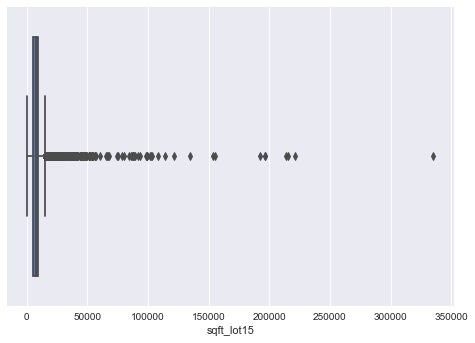

In [130]:
sns.boxplot(x=df11['sqft_lot15'])

Text(0, 0.5, 'Price')

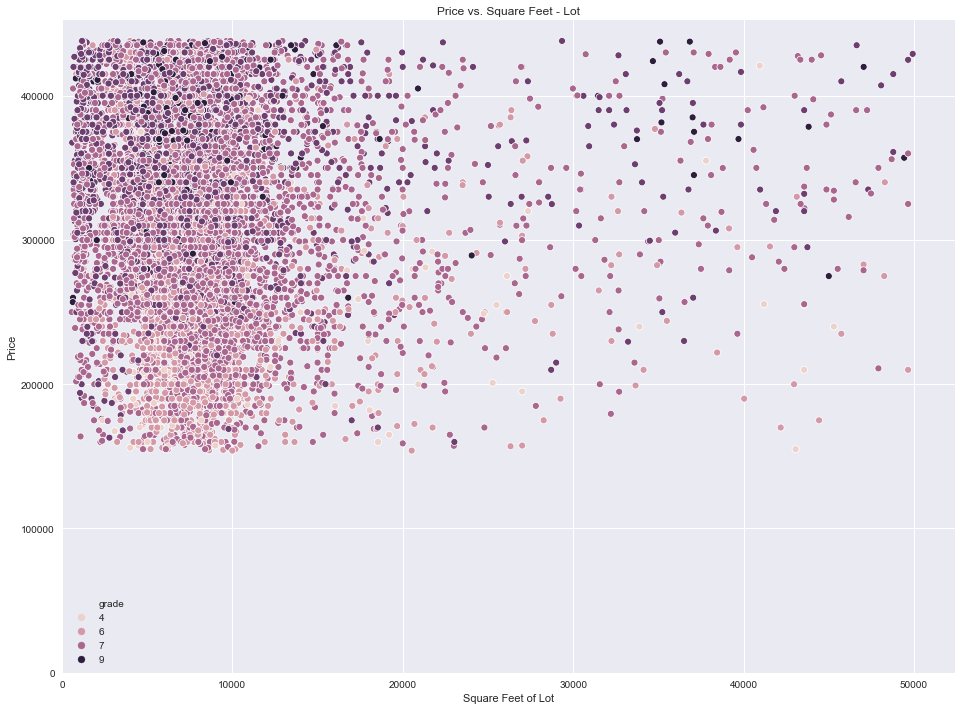

In [131]:
plt.figure(figsize=(16,12))
ax = sns.scatterplot(data=df11, x="sqft_lot", y="price", hue="grade")
plt.xlim(0,None)
plt.ylim(0,None)
plt.title("Price vs. Square Feet - Lot")
plt.xlabel("Square Feet of Lot")
plt.ylabel("Price")

,price,sqft_living,sqft_lot,floors,view,condition,grade,sqft_living15,bed_bath,yrbuilt_95,yrbuilt_75,yrbuilt_55,yrbuilt_35,yrbuilt_15,lat_2,lat_3,lat_4,lat_5,lat_6
price,1.000000,0.296486,-0.049790,0.209504,0.068408,-0.044326,0.342423,0.271718,0.237693,0.015221,-0.079022,-0.093384,0.000852,0.185682,-0.275255,-0.149652,-0.020010,0.213713,0.342604
sqft_living,0.296486,1.000000,0.143194,0.280222,0.041559,-0.083110,0.537291,0.654876,0.758496,-0.150338,-0.248881,0.082532,0.174650,0.186223,0.225766,0.180729,-0.140635,-0.150026,-0.166690
sqft_lot,-0.049790,0.143194,1.000000,-0.272455,0.058380,0.124767,-0.026624,0.174364,-0.001386,0.008056,0.070333,0.197346,0.067133,-0.337322,0.102321,0.100674,-0.078492,-0.102575,-0.069676
floors,0.209504,0.280222,-0.272455,1.000000,-0.046048,-0.273245,0.409865,0.219384,0.392971,-0.092253,-0.323325,-0.325465,0.214568,0.620452,0.067467,0.010144,-0.075178,0.022525,-0.009625
view,0.068408,0.041559,0.058380,-0.046048,1.000000,0.020123,0.006997,0.092654,-0.001246,0.027038,0.043744,-0.020788,-0.020423,-0.040446,-0.015199,0.005570,0.041885,-0.017117,-0.053444
condition,-0.044326,-0.083110,0.124767,-0.273245,0.020123,1.000000,-0.191449,-0.127058,-0.112290,0.033110,0.132666,0.182218,-0.137534,-0.282551,0.014207,0.033987,-0.005335,-0.053443,-0.027030
grade,0.342423,0.537291,-0.026624,0.409865,0.006997,-0.191449,1.000000,0.502715,0.490978,-0.223237,-0.310221,0.056266,0.223657,0.339326,0.175600,0.114640,-0.221246,-0.011931,-0.043460
sqft_living15,0.271718,0.654876,0.174364,0.219384,0.092654,-0.127058,0.502715,1.000000,0.521213,-0.117409,-0.255057,0.042276,0.178544,0.202087,0.214453,0.175004,-0.197660,-0.092919,-0.117723
bed_bath,0.237693,0.758496,-0.001386,0.392971,-0.001246,-0.112290,0.490978,0.521213,1.000000,-0.194494,-0.335779,0.035590,0.249349,0.303100,0.210649,0.161977,-0.133728,-0.112452,-0.160954
yrbuilt_95,0.015221,-0.150338,0.008056,-0.092253,0.027038,0.033110,-0.223237,-0.117409,-0.194494,1.000000,-0.146792,-0.154614,-0.125871,-0.117846,-0.107346,-0.096787,0.122372,0.002573,0.062047


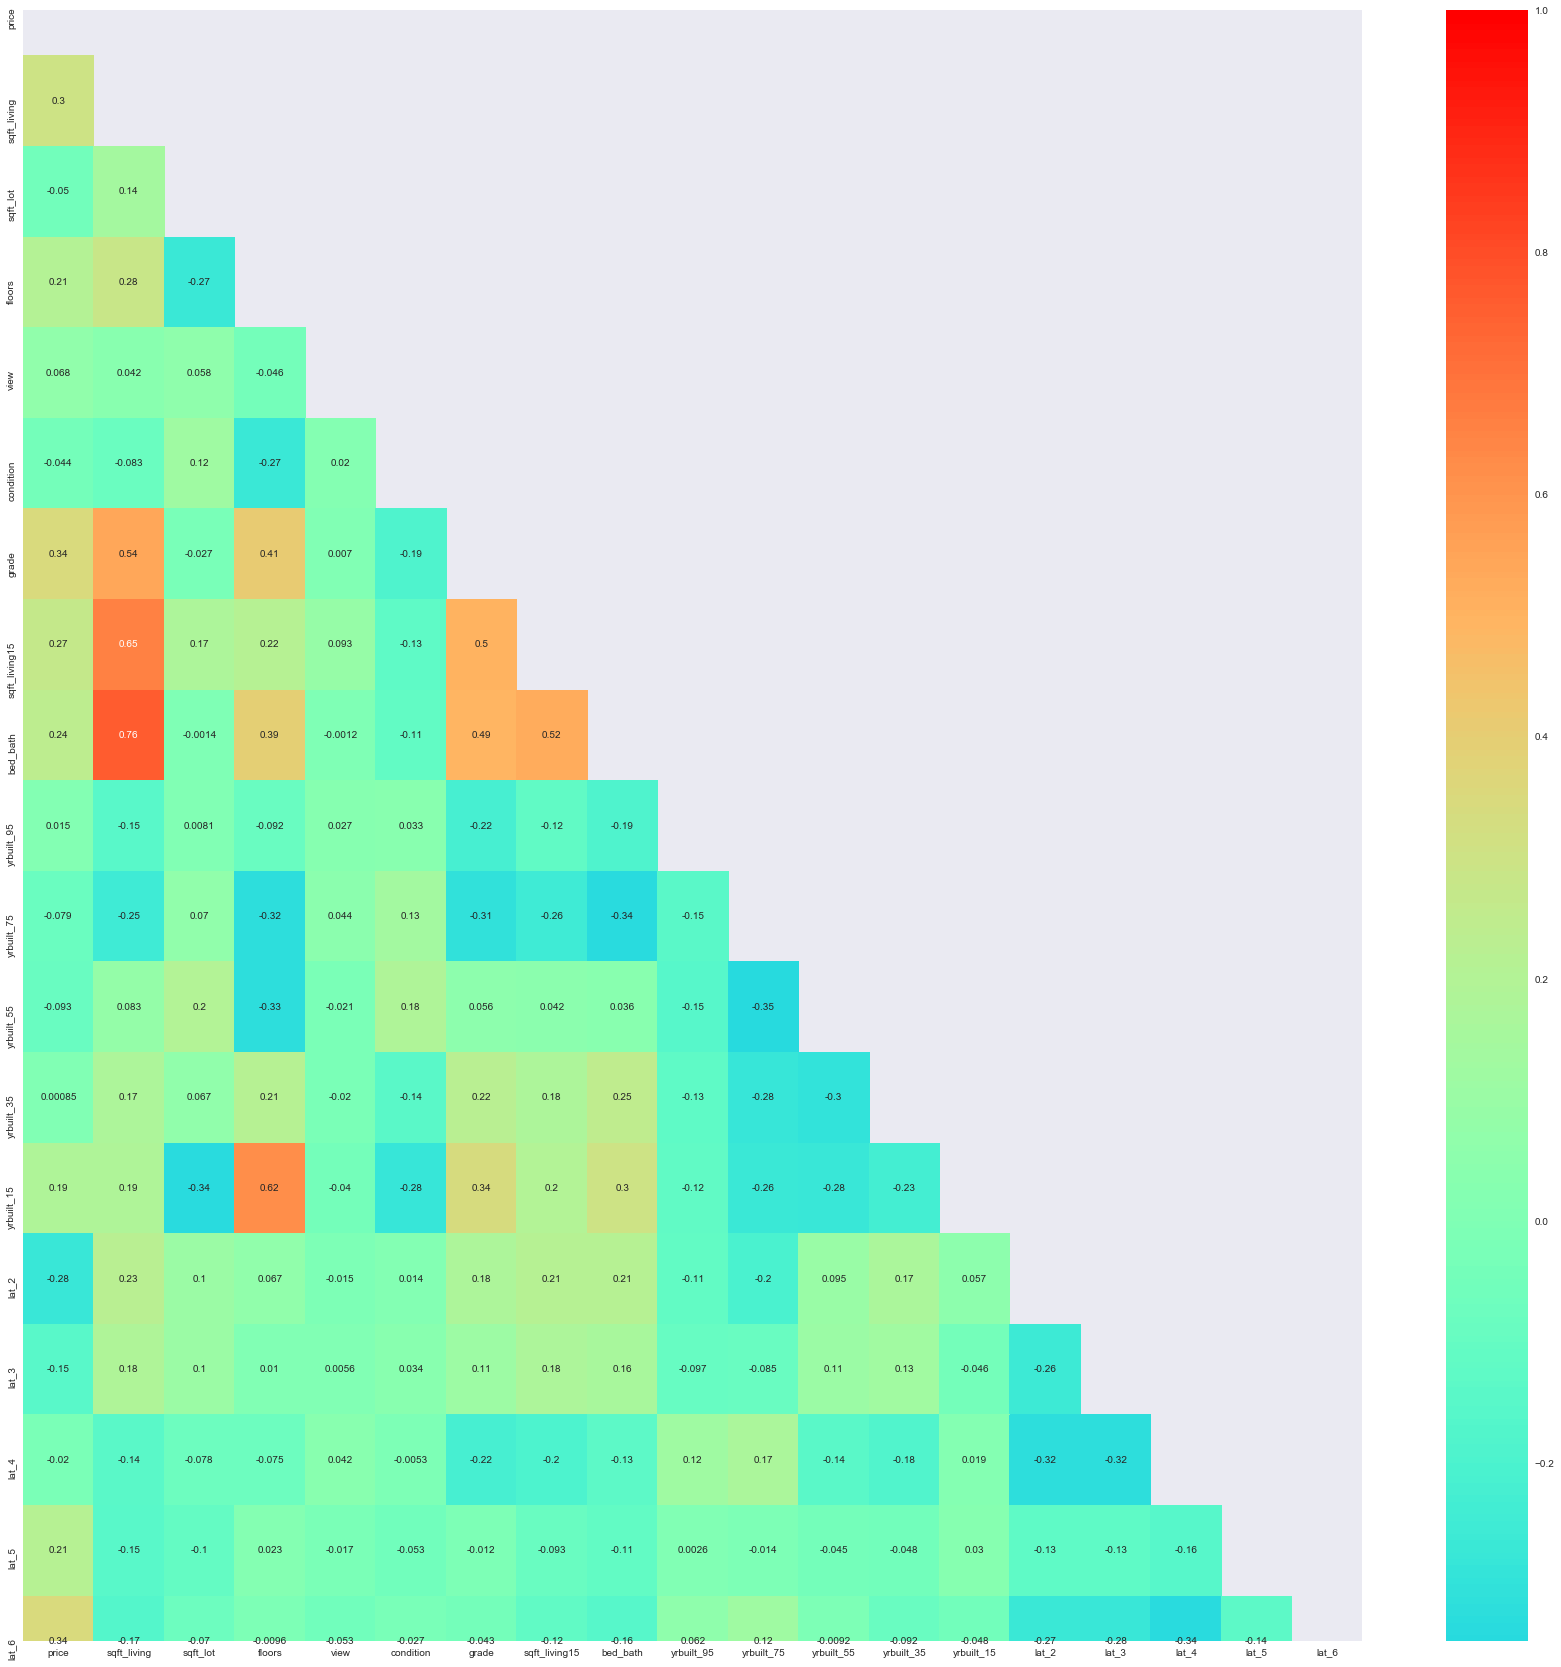

In [137]:
corr = df12.corr()
display(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,30))
sns.heatmap(corr, cmap='rainbow', mask = mask, annot=True, center=0)

### Modeling with a few added columns

In [51]:
# Drop some unnecessary columns
df7 = df6_low.drop(['id', 'date','bedrooms','bathrooms','sqft_lot15','sqft_above','sqft_basement','waterfront','yr_renovated', 'zipcode', 'long'], axis=1)

In [52]:
df7.head(2)

,price,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,lat,sqft_living15,bed_bath
0,221900.0,1180,5650,1.0,0.0,3,7,1955,47.5112,1340,3.0
2,180000.0,770,10000,1.0,0.0,3,6,1933,47.7379,2720,2.0


In [53]:
# Create train, test split
train, test = train_test_split(df7, test_size=0.25, random_state=42)

In [54]:
print(train.shape, test.shape)

(7509, 11) (2504, 11)


In [56]:
# MODEL 1 Saturday - df7
# Run a new model with this dataset (most variables but not collinear items)
from statsmodels.formula.api import ols
outcome = 'price'
predictors = train.drop(['price'], axis=1)
pred_sum = "+".join(predictors)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=train).fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     727.0
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:44:34   Log-Likelihood:                -92092.
No. Observations:                7509   AIC:                         1.842e+05
Df Residuals:                    7498   BIC:                         1.843e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.326e+07   2.22e+05    -59.866      0.000   -1.37e+07   -1.28e+07
sqft_living      32.1546      1.992     16.145      0.000      28.250      36.059
sqft_lot          0.2577      0.024     10.581      0.000       0.210       0.305
floors         1.316e+04   1456.934      9.030      0.000    1.03e+04     1.6e+04
view           1.397e+04   1540.469      9.070      0.000     1.1e+04     1.7e+04
condition      1.002e+04    988.677     10.136      0.000    8082.967     1.2e+04
grade          2.097e+04   1076.940     19.469      0.000    1.89e+04    2.31e+04
yr_built        -91.8720     32.643     -2.814      0.005    -155.861     -27.883
lat            2.833e+05   4208.684     67.323      0.000    2.75e+05    2.92e+05
sqft_living15    23.6224      1.908     12.382      0.000      19.883      27.362
bed_bath        950.8787    325.679      2.920      0.004     312.457    1589.300
==============================================================================
Omnibus:                       19.032   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.932
Skew:                          -0.010   Prob(JB):                     6.36e-06
Kurtosis:                       3.276   Cond. No.                     1.03e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


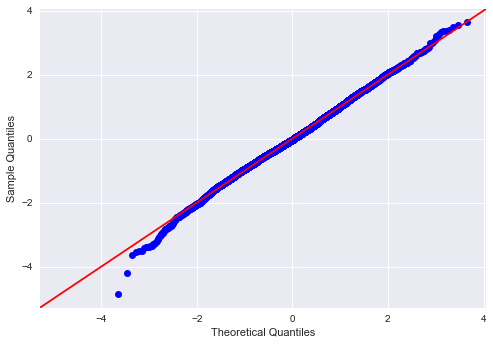

In [58]:
# QQ-Plot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Text(0.5, 0.99, 'Residuals Scatterplot')

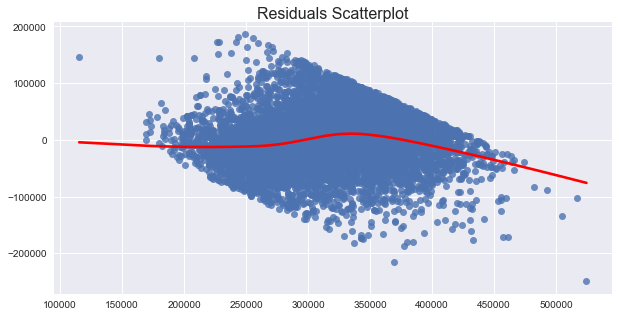

In [59]:
plt.figure(figsize=(10,5))
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)

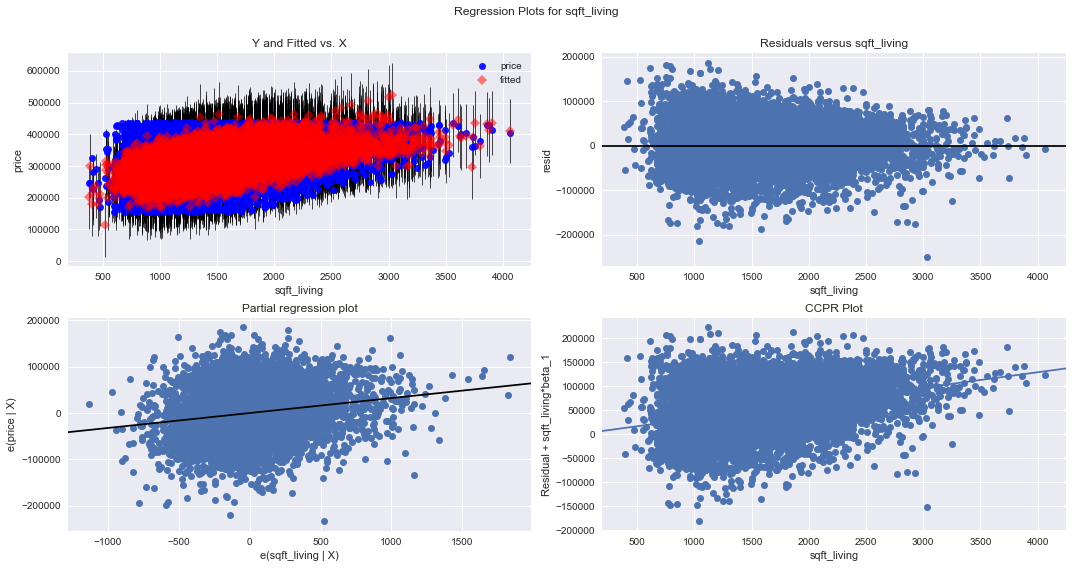

In [69]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [61]:
# Conduct a baseline of RMSE
# Split data into x and y versions of train and test
y_test = test[['price']]
X_test = test.drop(['price'],axis=1)
y_train = train[['price']]
X_train = train.drop(['price'],axis=1)

In [62]:
# Try and baseline this to the test data set (before changes)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', train_mse**0.5)
print('Test Root Mean Squarred Error:', test_mse**0.5)

Train Root Mean Squarred Error: 51290.4275409155
Test Root Mean Squarred Error: 51439.875133991605


In [97]:
# checking other way of getting RMSE
np.sqrt(train_mse)

51290.4275409155

In [99]:
# Taking a look at what is here
y_hat_train

array([[327407.86204248],
       [267464.22664056],
       [249715.6854824 ],
       ...,
       [269163.53742827],
       [355435.2340687 ],
       [337081.68923539]])

In [132]:
df11.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_bath,lat_bands,yrbuilt_bands,yrbuilt_95,yrbuilt_75,yrbuilt_55,yrbuilt_35,yrbuilt_15,lat_2,lat_3,lat_4,lat_5,lat_6
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3.0,"(47.467, 47.57]",75,0,1,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2.0,"(47.674, 47.778]",95,1,0,0,0,0,0,0,0,0,1


In [133]:
# Drop some unnecessary columns
df12 = df11.drop(['id', 'date','bedrooms','bathrooms','sqft_lot15','sqft_above','sqft_basement','waterfront','yr_renovated', 'zipcode', 'long', 'lat', 'yr_built', 'lat_bands', 'yrbuilt_bands'], axis=1)
df12.head(2)

,price,sqft_living,sqft_lot,floors,view,condition,grade,sqft_living15,bed_bath,yrbuilt_95,yrbuilt_75,yrbuilt_55,yrbuilt_35,yrbuilt_15,lat_2,lat_3,lat_4,lat_5,lat_6
0,221900.0,1180,5650,1.0,0.0,3,7,1340,3.0,0,1,0,0,0,0,0,1,0,0
2,180000.0,770,10000,1.0,0.0,3,6,2720,2.0,1,0,0,0,0,0,0,0,0,1


In [134]:
# Create train, test split - Sat. PM
train, test = train_test_split(df12, test_size=0.25, random_state=42)
print(train.shape, test.shape)

(7212, 19) (2404, 19)


In [135]:
Model #2 - Sat. PM
from statsmodels.formula.api import ols
outcome = 'price'
predictors = train.drop(['price'], axis=1)
pred_sum = "+".join(predictors)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=train).fit()

In [136]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     447.4
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:38:23   Log-Likelihood:                -88152.
No. Observations:                7212   AIC:                         1.763e+05
Df Residuals:                    7193   BIC:                         1.765e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.878e+04   9025.473     -5.404      0.000   -6.65e+04   -3.11e+04
sqft_living      39.2113      2.088     18.777      0.000      35.118      43.305
sqft_lot          0.3357      0.110      3.064      0.002       0.121       0.550
floors        -1981.5823   1691.212     -1.172      0.241   -5296.854    1333.689
view           1.265e+04   1645.594      7.687      0.000    9424.283    1.59e+04
condition      1.241e+04    994.755     12.476      0.000    1.05e+04    1.44e+04
grade          2.344e+04   1106.592     21.178      0.000    2.13e+04    2.56e+04
sqft_living15    20.2101      1.945     10.391      0.000      16.397      24.023
bed_bath       1031.0861    340.777      3.026      0.002     363.063    1699.109
yrbuilt_95    -2186.7507   3510.327     -0.623      0.533   -9068.023    4694.521
yrbuilt_75        -2e+04   2888.544     -6.925      0.000   -2.57e+04   -1.43e+04
yrbuilt_55    -2.436e+04   3024.622     -8.055      0.000   -3.03e+04   -1.84e+04
yrbuilt_35    -8367.3168   3262.311     -2.565      0.010   -1.48e+04   -1972.228
yrbuilt_15     -761.3573   3511.115     -0.217      0.828   -7644.174    6121.459
lat_2          6470.3393   4250.388      1.522      0.128   -1861.670    1.48e+04
lat_3          3.199e+04   4254.907      7.518      0.000    2.36e+04    4.03e+04
lat_4          7.722e+04   4243.182     18.199      0.000    6.89e+04    8.55e+04
lat_5          1.435e+05   4742.798     30.252      0.000    1.34e+05    1.53e+05
lat_6          1.249e+05   4294.810     29.072      0.000    1.16e+05    1.33e+05
==============================================================================
Omnibus:                       79.065   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.501
Skew:                          -0.140   Prob(JB):                     1.01e-24
Kurtosis:                       3.538   Cond. No.                     2.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
train.head(2)

,price,sqft_living,sqft_lot,floors,view,condition,grade,sqft_living15,bed_bath,yrbuilt_95,yrbuilt_75,yrbuilt_55,yrbuilt_35,yrbuilt_15,lat_2,lat_3,lat_4,lat_5,lat_6
12552,417000.0,2090,4000,1.0,0.0,3,6,1590,8.0,0,0,0,0,0,0,0,0,1,0
10297,329000.0,1120,3844,1.0,0.0,3,7,1480,4.0,0,0,1,0,0,0,0,0,0,1


In [142]:
# Drop some unnecessary columns
train2 = train.drop(['yrbuilt_95', 'floors', 'bed_bath', 'sqft_living15','sqft_lot'], axis=1)
train2.head(2)

,price,sqft_living,view,condition,grade,yrbuilt_75,yrbuilt_55,yrbuilt_35,yrbuilt_15,lat_2,lat_3,lat_4,lat_5,lat_6
12552,417000.0,2090,0.0,3,6,0,0,0,0,0,0,0,1,0
10297,329000.0,1120,0.0,3,7,0,1,0,0,0,0,0,0,1


In [143]:
# MODEL #3 - Saturday pm
outcome = 'price'
predictors = train2.drop(['price'], axis=1)
pred_sum = "+".join(predictors)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=train2).fit()

In [144]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     596.8
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:09:18   Log-Likelihood:                -88223.
No. Observations:                7212   AIC:                         1.765e+05
Df Residuals:                    7198   BIC:                         1.766e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.183e+04   8801.746     -4.752      0.000   -5.91e+04   -2.46e+04
sqft_living    52.0954      1.439     36.207      0.000      49.275      54.916
view         1.458e+04   1652.343      8.823      0.000    1.13e+04    1.78e+04
condition    1.211e+04   1000.208     12.108      0.000    1.01e+04    1.41e+04
grade        2.502e+04   1089.638     22.961      0.000    2.29e+04    2.72e+04
yrbuilt_75  -1.929e+04   2143.731     -9.000      0.000   -2.35e+04   -1.51e+04
yrbuilt_55  -2.218e+04   2289.813     -9.686      0.000   -2.67e+04   -1.77e+04
yrbuilt_35  -5900.3831   2536.696     -2.326      0.020   -1.09e+04    -927.715
yrbuilt_15    -84.1224   2615.737     -0.032      0.974   -5211.736    5043.491
lat_2        8108.2205   4285.835      1.892      0.059    -293.275    1.65e+04
lat_3        3.366e+04   4286.019      7.853      0.000    2.53e+04    4.21e+04
lat_4        7.598e+04   4275.071     17.773      0.000    6.76e+04    8.44e+04
lat_5        1.427e+05   4767.075     29.932      0.000    1.33e+05    1.52e+05
lat_6        1.243e+05   4317.189     28.795      0.000    1.16e+05    1.33e+05
==============================================================================
Omnibus:                       65.339   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.433
Skew:                          -0.113   Prob(JB):                     1.40e-20
Kurtosis:                       3.503   Cond. No.                     3.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


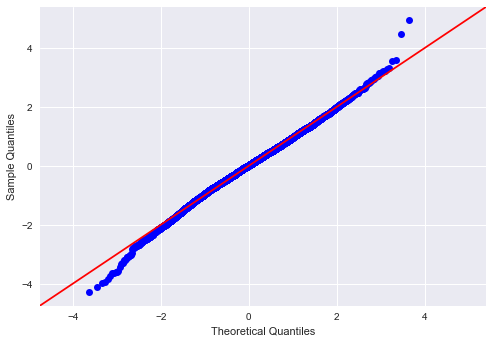

In [145]:
# QQ-Plot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Text(0.5, 0.99, 'Residuals Scatterplot')

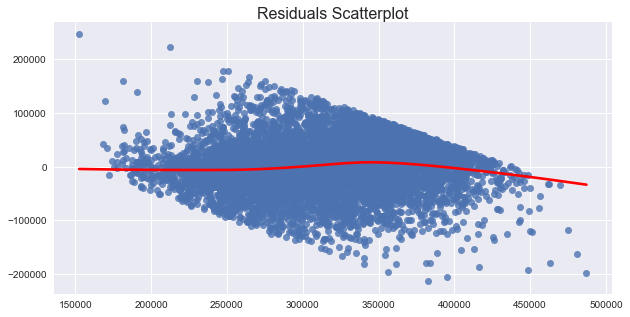

In [146]:
plt.figure(figsize=(10,5))
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)

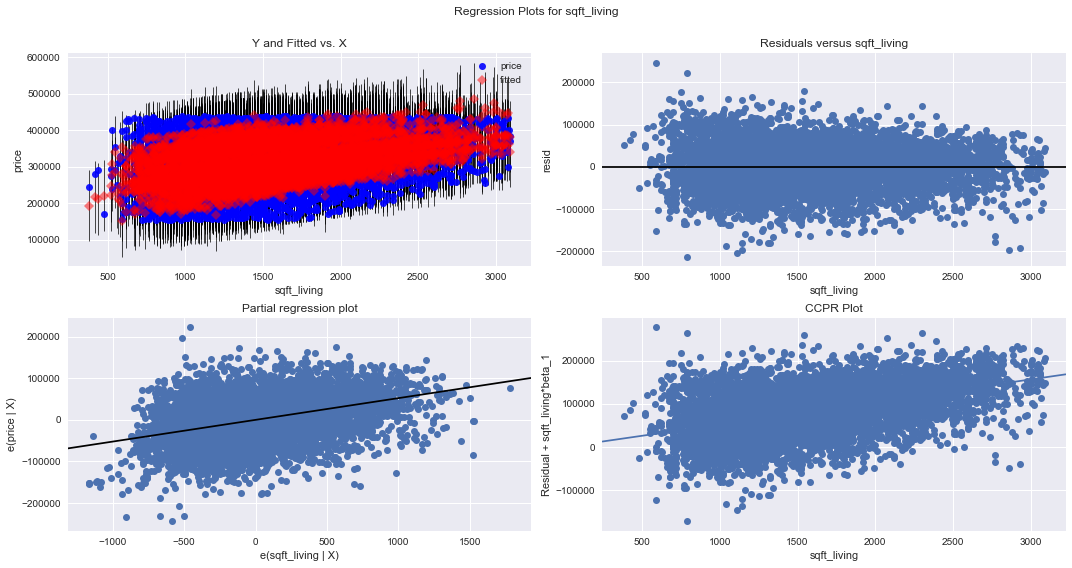

In [171]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [ ]:
# Model #4 - Sunday AM
# Just cutting our a few variables with insignificant T-scores

In [155]:
# Drop some unnecessary columns
train2 = train2.drop(['yrbuilt_95', 'bed_bath', 'sqft_living15', 'sqft_lot', 'floors'], axis=1)
train2.head(2)

,price,sqft_living,view,condition,grade,yrbuilt_75,yrbuilt_55,yrbuilt_35,lat_3,lat_4,lat_5,lat_6
12552,417000.0,2090,0.0,3,6,0,0,0,0,0,1,0
10297,329000.0,1120,0.0,3,7,0,1,0,0,0,0,1


In [166]:
outcome = 'price'
predictors = train2.drop(['price'], axis=1)
pred_sum = "+".join(predictors)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=train2).fit()

In [167]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     704.8
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:05:35   Log-Likelihood:                -88225.
No. Observations:                7212   AIC:                         1.765e+05
Df Residuals:                    7200   BIC:                         1.766e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.443e+04   7857.342     -4.382      0.000   -4.98e+04    -1.9e+04
sqft_living    52.1787      1.438     36.294      0.000      49.360      54.997
view         1.431e+04   1640.690      8.723      0.000    1.11e+04    1.75e+04
condition    1.202e+04    981.466     12.250      0.000    1.01e+04    1.39e+04
grade        2.502e+04   1006.274     24.864      0.000     2.3e+04     2.7e+04
yrbuilt_75  -1.914e+04   1692.656    -11.306      0.000   -2.25e+04   -1.58e+04
yrbuilt_55  -2.194e+04   1652.905    -13.274      0.000   -2.52e+04   -1.87e+04
yrbuilt_35  -5861.1243   1801.505     -3.253      0.001   -9392.603   -2329.645
lat_3        2.629e+04   1785.596     14.722      0.000    2.28e+04    2.98e+04
lat_4        6.866e+04   1805.346     38.031      0.000    6.51e+04    7.22e+04
lat_5        1.354e+05   2775.422     48.775      0.000     1.3e+05    1.41e+05
lat_6         1.17e+05   1870.692     62.523      0.000    1.13e+05    1.21e+05
==============================================================================
Omnibus:                       65.083   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.356
Skew:                          -0.111   Prob(JB):                     1.45e-20
Kurtosis:                       3.505   Cond. No.                     2.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


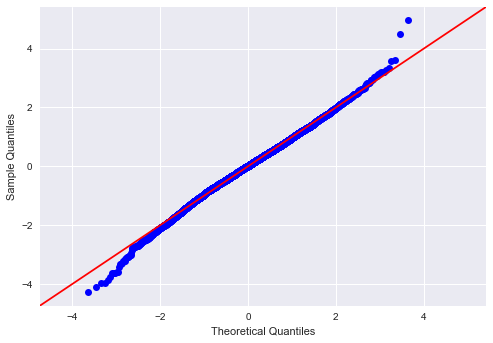

In [168]:
# QQ-Plot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Text(0.5, 0.99, 'Residuals Scatterplot')

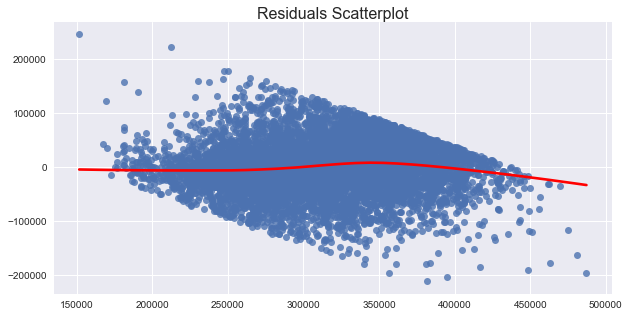

In [169]:
plt.figure(figsize=(10,5))
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)

In [159]:
train2.head(1)

,price,sqft_living,view,condition,grade,yrbuilt_75,yrbuilt_55,yrbuilt_35,lat_3,lat_4,lat_5,lat_6
12552,417000.0,2090,0.0,3,6,0,0,0,0,0,1,0


In [160]:
test.head(1)

,price,sqft_living,sqft_lot,floors,view,condition,grade,sqft_living15,bed_bath,yrbuilt_95,yrbuilt_75,yrbuilt_55,yrbuilt_35,yrbuilt_15,lat_2,lat_3,lat_4,lat_5,lat_6
18006,315000.0,1600,7982,2.0,0.0,3,8,1890,7.5,0,0,0,1,0,1,0,0,0,0


In [161]:
# Trun Test into same size df as Train2
test2 = test.drop(['yrbuilt_95', 'yrbuilt_15', 'bed_bath', 'sqft_living15', 'sqft_lot', 'floors', 'lat_2'], axis=1)
test2.head(2)

,price,sqft_living,view,condition,grade,yrbuilt_75,yrbuilt_55,yrbuilt_35,lat_3,lat_4,lat_5,lat_6
18006,315000.0,1600,0.0,3,8,0,0,1,0,0,0,0
12934,206000.0,1140,0.0,4,7,0,1,0,0,0,0,0


In [162]:
train2.head(1)

,price,sqft_living,view,condition,grade,yrbuilt_75,yrbuilt_55,yrbuilt_35,lat_3,lat_4,lat_5,lat_6
12552,417000.0,2090,0.0,3,6,0,0,0,0,0,1,0


In [163]:
# Conduct a final check of RMSE (after 3 models with train)
# Split data into x and y versions of train and test
y_test = test2[['price']]
X_test = test2.drop(['price'],axis=1)
y_train = train2[['price']]
X_train = train2.drop(['price'],axis=1)

In [164]:
# Try and baseline this to the test data set (before changes)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [165]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', train_mse**0.5)
print('Test Root Mean Squarred Error:', test_mse**0.5)

Train Root Mean Squarred Error: 49719.21847808799
Test Root Mean Squarred Error: 50136.95310243738


In [ ]:
# Try cross validation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score


In [172]:
# Need to change full dataframe into X, Y ... but needd to make df12 the right size to match last model.
df12.head(1)

,price,sqft_living,sqft_lot,floors,view,condition,grade,sqft_living15,bed_bath,yrbuilt_95,yrbuilt_75,yrbuilt_55,yrbuilt_35,yrbuilt_15,lat_2,lat_3,lat_4,lat_5,lat_6
0,221900.0,1180,5650,1.0,0.0,3,7,1340,3.0,0,1,0,0,0,0,0,1,0,0


In [175]:
df13 = df12.drop(['yrbuilt_95', 'yrbuilt_15', 'bed_bath', 'sqft_living15', 'sqft_lot', 'floors', 'lat_2'], axis=1)

In [176]:
df13.head(1)

,price,sqft_living,view,condition,grade,yrbuilt_75,yrbuilt_55,yrbuilt_35,lat_3,lat_4,lat_5,lat_6
0,221900.0,1180,0.0,3,7,1,0,0,0,1,0,0


In [ ]:
# PREDICTION plug and play

In [178]:
df13.drop(['price'], axis=1)
linreg.predict(np.array([2000,0,4,7,0,0,1,0,0,0,1]).reshape(1,-1))

array([[404256.12262577]])

In [179]:
df14 = df13.drop(['price'], axis=1)

In [183]:
Y=df13[['price']]

In [182]:
df13.head(1)

,price,sqft_living,view,condition,grade,yrbuilt_75,yrbuilt_55,yrbuilt_35,lat_3,lat_4,lat_5,lat_6
0,221900.0,1180,0.0,3,7,1,0,0,0,1,0,0


In [191]:
X=df14

In [192]:
X.head(1)

,sqft_living,view,condition,grade,yrbuilt_75,yrbuilt_55,yrbuilt_35,lat_3,lat_4,lat_5,lat_6
0,1180,0.0,3,7,1,0,0,0,1,0,0


In [197]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [199]:
# K-Folds from video - Data School (Pandas guy)
# Uses original X and Y data - not train or test
model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=8, scoring="r2")
print (scores)

[0.49638862 0.53013982 0.50607059 0.480341   0.51545792 0.52975556
 0.53664643 0.47250196]


In [201]:
scores.mean()

0.5084127370064742

In [ ]:
# Observations for r2: 
# range 0.47 to 0.54
# average of 0.51

In [202]:
from sklearn.metrics import mean_squared_error

In [207]:
model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=8, scoring="neg_mean_squared_error")
print (scores)

[-2.55337931e+09 -2.72610283e+09 -2.36683638e+09 -2.61101185e+09
 -2.50907383e+09 -2.38706833e+09 -2.51164600e+09 -2.29450161e+09]


In [208]:
rmse_scores = np.sqrt(-scores)
print (rmse_scores)

[50530.97381317 52212.09470977 48650.14265247 51098.06111085
 50090.65608332 48857.63324844 50116.32464228 47900.95627548]


In [209]:
rmse_scores.mean()

49932.105316973255

In [ ]:
# Observations for RMSE: 
# RMSE ranges from 47,900 to 52, 212
# Mean RMSE is 49,932 for our model

### EXTRA STUFF: Alternate methods for feature selection for model

In [ ]:
# Code to seperate x and y
outcome = 'msrp'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [ ]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

In [ ]:
#Backward Elimination in StatsModel
y = df['msrp']
cols = x_cols
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

In [ ]:
# Alternate method for elimination of variables from the model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [ ]:
#  Part 2 of the RFE ranking
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
# Run some models with sklearn?

### Cross Validation - extra stuff

In [ ]:
# Code from Andrew B. for cross validation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

cross_val_score(model, X_train, y_train, cv = 5, scoring = “r2”).mean())

In [ ]:
# From a YouTube video


